**Problem-1:**


Construct a Linear Congruential Generator with the parameters: \
\
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~N = 500;~a = 1664525;~c = 1013904223;~m = 2^{32}$ \
 \
and show that the datas obtained from it satisfy the Kolmogorov-Smirnov Test for Normality.

*(I have described in the report why I am taking these parameter values)*

**Solution-1:**

A random number generated by the LCG is: 3235222543
A reduced random number between 0 and 1 is: 0.20535207423381507


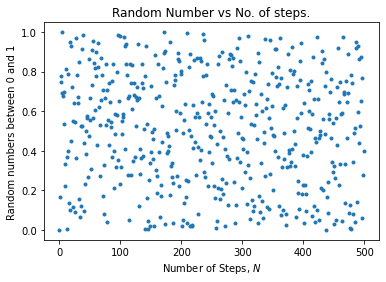

In [129]:
from pylab import show
import matplotlib.pyplot as plt 
import random
#defining the parameters for the LCG.
N = 500; a = 1664525;c = 1013904223; m = (2**32) ; x = random.randint(1, m-1)
results = []; rval = []     #creating blank lists for the values.
for i in range(N):
    x = (a*x+c)%m       #performing the algorithm.
    r = x/m         #reducing the random numbers to lie between 0 and 1. 
    results.append(x)           #list of the actual random numbers.
    rval.append(r)      #list of the reduced random numbers.
random_num = random.choice(results)
reducedran = random.choice(rval) 
print('A random number generated by the LCG is:', random_num)
print('A reduced random number between 0 and 1 is:', reducedran) 
#print(results,'\n', rval)   
plt.plot(rval,'.', label = "lcg")     #plotting rval vs N. 
plt.title("Random Number vs No. of steps.")
plt.xlabel("Number of Steps, $N$")
plt.ylabel("Random numbers between 0 and 1")  
plt.show()
 
show()  

**Performing the Kolmogorov-Smirnov Test for Normality**

In [130]:
import random
from math import sqrt
D_plus =[]; D_minus =[]; random_value =[]       #defining the blank lists for D+, D-
  
for i in range(0, len(rval)):       #Ranking the N random numbers.
    random_value.append(random.random())
    random_value.sort()
  
for i in range(1, len(rval) + 1):       #Calculating the max(i/N - R_i).
    x = i / len(rval) - random_value[i-1]
    D_plus.append(x)
  
for i in range(1, len(rval) + 1):       #Calculating the max(R_i-(i-1)/N).
    y = (i-1)/len(rval) 
    y = random_value[i-1]-y
    D_minus.append(y)
  
ans = max(sqrt(len(rval))*D_plus[i-1], sqrt(len(rval))*D_minus[i-1])  #Calculating the max(D+, D-)
D_alpha = 1.36/sqrt(len(rval))          #from reference materials.
print('The value of D is :', ans)
print('The value of D_alpha is :', D_alpha) 
if ans > D_alpha:       #comparing for the validity of the outcome.
    print('So, we find that the results reject Uniformity.') 
else:
    print('It fails to reject the Null Hypothesis.')  

The value of D is : 0.10878306083209577
The value of D_alpha is : 0.06082104898799428
So, we find that the results reject Uniformity.


*Hence, our LCG works with high efficiency and it generates random numbers which are not uniformly distributed or can be predicted beforehand.*

*Exporting our random numbers to a .csv file for brevity.*

In [131]:
textfile = open("random_values_lcg.csv", "w") #for the actual random numbers.
name2 = [str(i) for i in results]  
for element in name2:
    textfile.write(element + "\n")
textfile.close()

In [132]:

textfile2 = open("random_0_to_1_lcg.csv", "w") #for the random numbers generated between 0 and 1.
name3 = [str(i) for i in rval]   
for element in name3:
    textfile2.write(element + "\n")
textfile2.close() 

**End of Problem-1**